# Point and Area Processing Tutorial

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [27]:

def load_image(image_name: str, flags: int) -> np.ndarray:
    '''
    Load an image from the file system and return it as a numpy array.

    Parameters:
        image_name (str): The name of the image file.

    Returns:
        np.ndarray: The loaded image as a numpy array.
    '''
    image: np.ndarray = cv2.imread(image_name, flags)
    if len(image.shape) == 2:
        (h, w) = image.shape
    else:
        (h, w, d) = image.shape
    image: np.ndarray = cv2.resize(image, (int(h/3), int(w/3)))
    return image

def show_images(images: list[np.ndarray]) -> None:
    '''
    Display an image.

    Parameters:
        image (list[np.ndarray]): The image to display.
    '''
    fig = plt.figure(figsize=(20, 20))
    for i, row in enumerate(images):
        for j, (image, title) in enumerate(row):
            fig.add_subplot(len(images), len(row), i * len(row) + j + 1)
            # showing image
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(title)

## Part 1: Point Processing
**Objective**: Experiment with various point processing techniques to understand their effects on image data, using an image of your choice.

**Logarithmic Transform**: s = a * log(1 + r) (where r is the original pixel value, s is the processed value, and a is the scaling factor)

In [28]:
def logarithmicTransformation(image: np.ndarray, scaling_factor: float) -> np.ndarray:
    '''
    Apply logarithmic transformation to the input image.

    Parameters:
        image (np.ndarray): The input image.
        scaling_factor (float): The scaling factor.

    Returns:
        np.ndarray: The transformed image.
    '''
    # Apply logarithmic transformation
    transformed_image: np.ndarray = scaling_factor * np.log(1 + image)
    # Normalize the transformed image
    transformed_image = transformed_image.astype(np.uint8)
    return transformed_image

**Power Law Transform**: s = c * r^gamma (where c is the scaling factor and gamma is the power factor)

In [29]:
def powerLawTransformation(image: np.ndarray, scaling_factor: float, gamma: float) -> np.ndarray:
    '''
    Apply power-law transformation to the input image.

    Parameters:
        image (np.ndarray): The input image.
        scaling_factor (float): The scaling factor.
        gamma (float): The gamma value.

    Returns:
        np.ndarray: The transformed image.
    '''
    # Apply power-law transformation
    transformed_image: np.ndarray = scaling_factor * np.power(image, gamma)
    # Normalize the transformed image
    transformed_image = transformed_image.astype(np.uint8)
    return transformed_image

**Negative Transformation**: s = 255 - r

In [30]:
def negativeTransformation(image: np.ndarray) -> np.ndarray:
    '''
    Apply negative transformation to the input image.

    Parameters:
        image (np.ndarray): The input image.

    Returns:
        np.ndarray: The transformed image.
    '''
    # Apply negative transformation
    transformed_image: np.ndarray = 255 - image
    return transformed_image

### Apply Transformations And Visualize Results

C:\Users\norph\AppData\Local\Temp\ipykernel_25772\2206249527.py:13: RuntimeWarning: divide by zero encountered in log
  transformed_image: np.ndarray = scaling_factor * np.log(1 + image)
C:\Users\norph\AppData\Local\Temp\ipykernel_25772\2206249527.py:15: RuntimeWarning: invalid value encountered in cast
  transformed_image = transformed_image.astype(np.uint8)


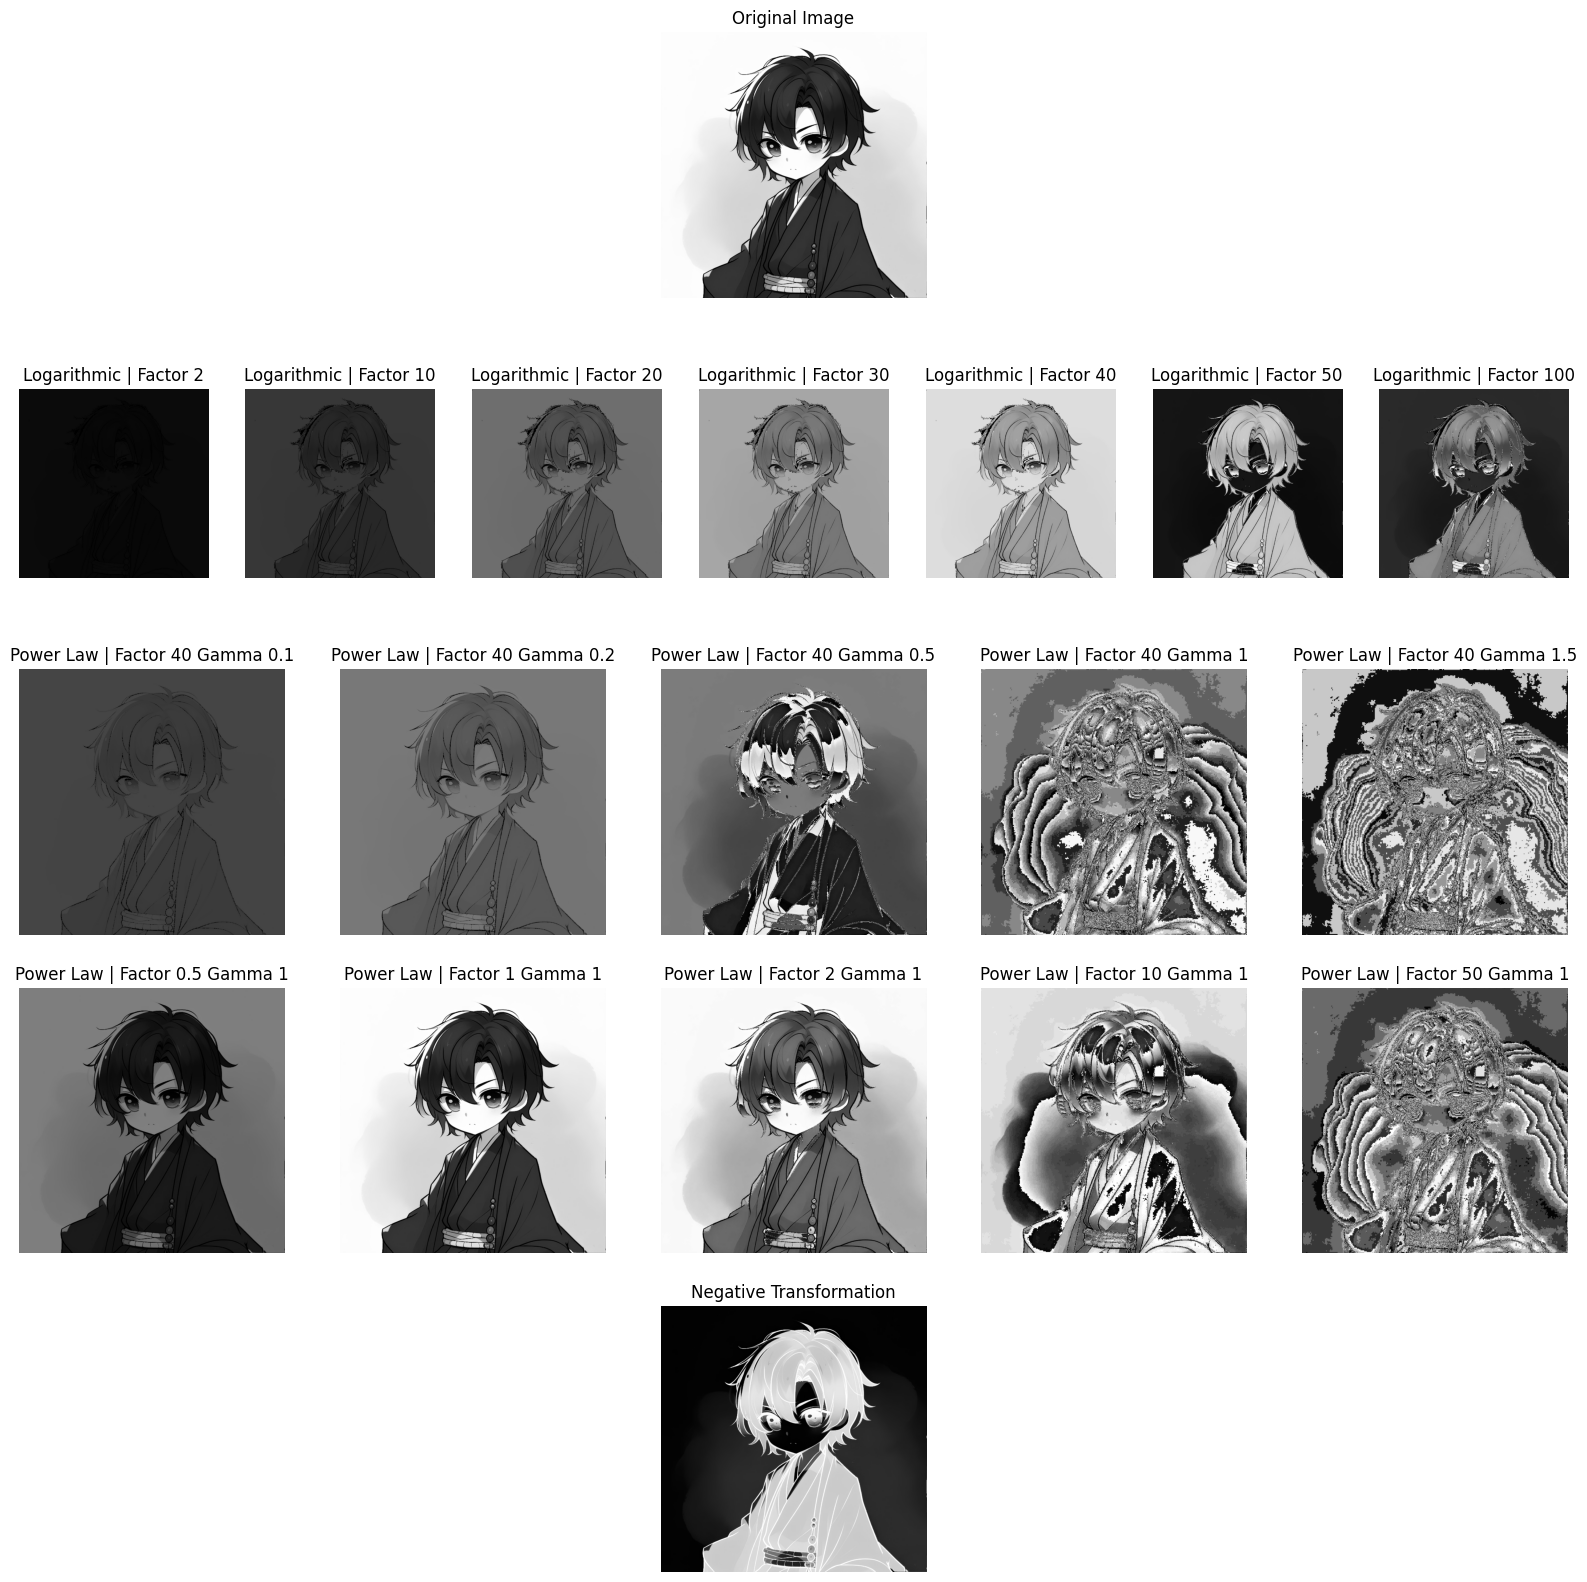

In [31]:
def pointProcessing():
    """
    Applies various point processing operations on an image.

    This function loads an image, performs logarithmic transformation, power law transformation,
    and negative transformation on the image. It then displays the original image and the transformed images.

    Args:
        None

    Returns:
        None
    """
    image_to_show: list = []
    # Load the image
    ori_images: list = []
    img_original: np.ndarray = load_image('image.jpg', cv2.IMREAD_GRAYSCALE)
    ori_images.append((img_original, 'Original Image'))
    # Logarithmic Transformation
    log_images: list = []
    img_log: np.ndarray = logarithmicTransformation(img_original, 2)
    log_images.append((img_log, 'Logarithmic | Factor 2'))
    img_log: np.ndarray = logarithmicTransformation(img_original, 10)
    log_images.append((img_log, 'Logarithmic | Factor 10'))
    img_log: np.ndarray = logarithmicTransformation(img_original, 20)
    log_images.append((img_log, 'Logarithmic | Factor 20'))
    img_log: np.ndarray = logarithmicTransformation(img_original, 30)
    log_images.append((img_log, 'Logarithmic | Factor 30'))
    img_log: np.ndarray = logarithmicTransformation(img_original, 40)
    log_images.append((img_log, 'Logarithmic | Factor 40'))
    img_log: np.ndarray = logarithmicTransformation(img_original, 50)
    log_images.append((img_log, 'Logarithmic | Factor 50'))
    img_log: np.ndarray = logarithmicTransformation(img_original, 100)
    log_images.append((img_log, 'Logarithmic | Factor 100'))
    # Power Law Transformation with factor 10
    pow10_images: list = []
    img_power: np.ndarray = powerLawTransformation(img_original, 40, 0.1)
    pow10_images.append((img_power, 'Power Law | Factor 40 Gamma 0.1'))
    img_power: np.ndarray = powerLawTransformation(img_original, 40, 0.2)
    pow10_images.append((img_power, 'Power Law | Factor 40 Gamma 0.2'))
    img_power: np.ndarray = powerLawTransformation(img_original, 40, 0.5)
    pow10_images.append((img_power, 'Power Law | Factor 40 Gamma 0.5'))
    img_power: np.ndarray = powerLawTransformation(img_original, 40, 1)
    pow10_images.append((img_power, 'Power Law | Factor 40 Gamma 1'))
    img_power: np.ndarray = powerLawTransformation(img_original, 40, 1.5)
    pow10_images.append((img_power, 'Power Law | Factor 40 Gamma 1.5'))
    # Power Law Transformation with factor 255
    pow255_images: list = []
    img_power: np.ndarray = powerLawTransformation(img_original, 0.5, 1)
    pow255_images.append((img_power, 'Power Law | Factor 0.5 Gamma 1'))
    img_power: np.ndarray = powerLawTransformation(img_original, 1, 1)
    pow255_images.append((img_power, 'Power Law | Factor 1 Gamma 1'))
    img_power: np.ndarray = powerLawTransformation(img_original, 2, 1)
    pow255_images.append((img_power, 'Power Law | Factor 2 Gamma 1'))
    img_power: np.ndarray = powerLawTransformation(img_original, 10, 1)
    pow255_images.append((img_power, 'Power Law | Factor 10 Gamma 1'))
    img_power: np.ndarray = powerLawTransformation(img_original, 50, 1)
    pow255_images.append((img_power, 'Power Law | Factor 50 Gamma 1'))

    # Negative Transformation
    neg_images: list = []
    img_negative: np.ndarray = negativeTransformation(img_original)
    neg_images.append((img_negative, 'Negative Transformation'))
    image_to_show.append(ori_images)
    image_to_show.append(log_images)
    image_to_show.append(pow10_images)
    image_to_show.append(pow255_images)
    image_to_show.append(neg_images)
    show_images(image_to_show)

pointProcessing()

### Conclusion

I noticed that the logarithmic transformation made the darker pixels brighter, then arriving at a specific luminosity value, it has the divide-by-zero error encountered in the log, so the brighter pixel becomes black because of the error I think.

The power law transformation expend lower pixel values or higher pixel values following the gamma value.

The negative transformation inverted the colors of the image.

## Part 2: Area Processing - Convolution
**Objective**: Understand the concept of convolution and its application in image processing.

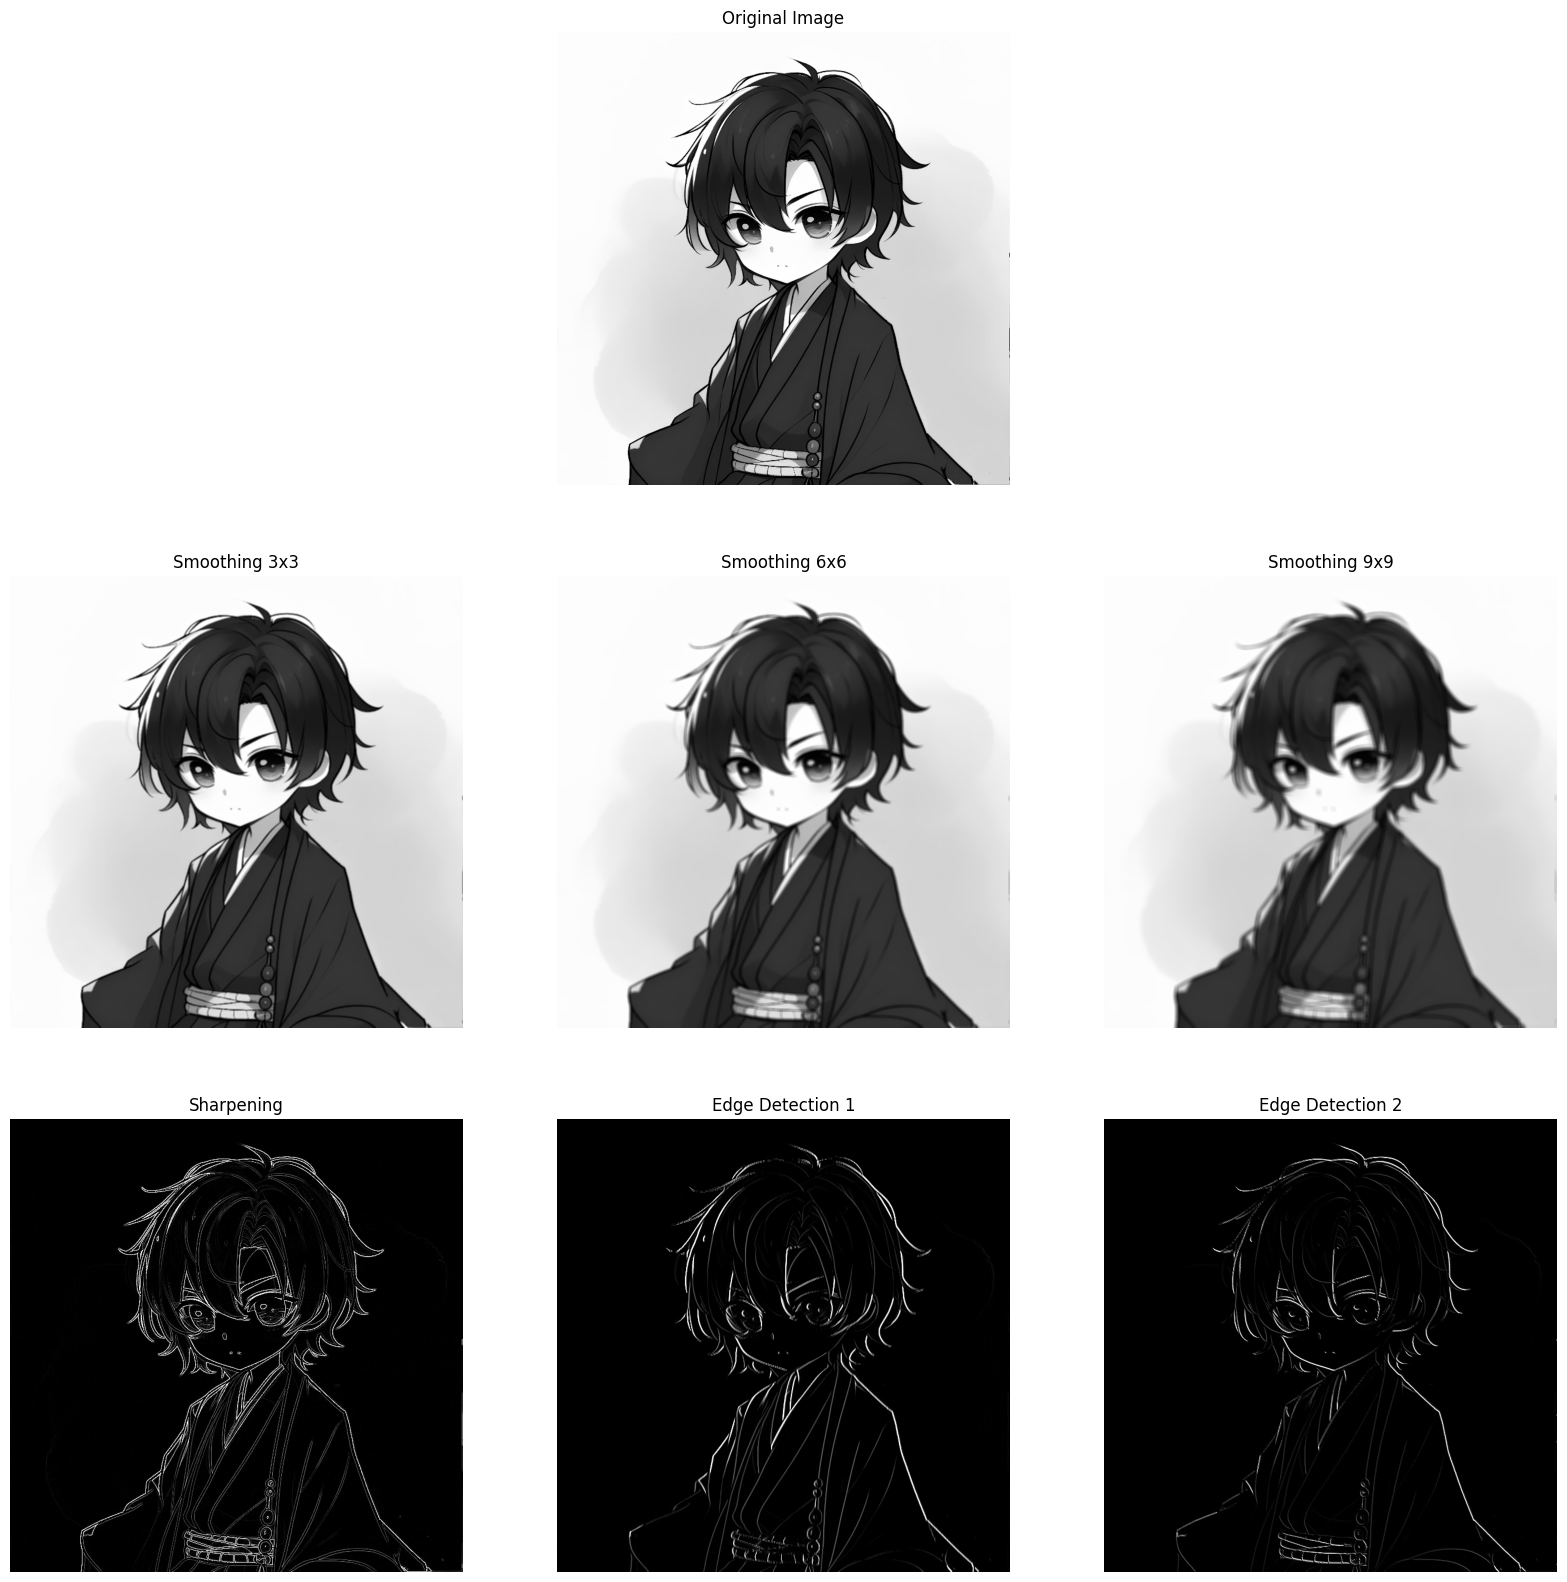

In [32]:
def convolution(img_original: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    """
    Applies convolution operation on the input image using the given kernel.

    Args:
        img_original (np.ndarray): The input image.
        kernel (np.ndarray): The convolution kernel.

    Returns:
        np.ndarray: The convolved image.
    """
    img_conv = cv2.filter2D(img_original, -1, kernel)
    return img_conv

def kernelSharpening():
    """
    Returns a numpy array representing a sharpening kernel.

    Returns:
    numpy.ndarray: The sharpening kernel.
    """
    return np.array([[-1, -1, -1],
                     [-1, 8, -1],
                     [-1, -1, -1]])

def kernelSmoothing(size: int = 3):
    """
    Creates a kernel for smoothing using a square matrix of ones.

    Parameters:
    - size (int): The size of the kernel matrix. Default is 3.

    Returns:
    - np.ndarray: The kernel matrix for smoothing.
    """
    return np.ones((size, size), np.float32) / (size * size)

def kernelEdgeDetection1():
    """
    Returns a numpy array representing a kernel for edge detection.

    Returns:
    numpy.ndarray: The kernel for edge detection.
    """
    return np.array([[-1, 0, 1],
                     [0, 0, 0],
                     [-1, 0, 1]])

def kernelEdgeDetection2():
    """
    Returns a numpy array representing a kernel for edge detection.

    Returns:
    numpy.ndarray: The kernel for edge detection.
    """
    return np.array([[0, 1, 0],
                     [-1, 0, 1],
                     [0, -1, 0]])


def areaProcessing():
    """
    Applies various image processing techniques to an input image.

    This function loads an image, performs convolution operations using different kernels,
    and displays the original image along with the processed images.

    Args:
        None

    Returns:
        None
    """
    image_to_show = []
    # Load the image
    ori_images = []
    img_original = load_image('image.jpg', cv2.IMREAD_GRAYSCALE)
    ori_images.append((img_original, 'Original Image'))
    # Convolution
    smooth_images = []
    img_smooth = convolution(img_original, kernelSmoothing(3))
    smooth_images.append((img_smooth, 'Smoothing 3x3'))
    img_smooth = convolution(img_original, kernelSmoothing(6))
    smooth_images.append((img_smooth, 'Smoothing 6x6'))
    img_smooth = convolution(img_original, kernelSmoothing(9))
    smooth_images.append((img_smooth, 'Smoothing 9x9'))
    sharp_images = []
    img_sharp = convolution(img_original, kernelSharpening())
    sharp_images.append((img_sharp, 'Sharpening'))
    edge_images = []
    img_edge = convolution(img_original, kernelEdgeDetection1())
    edge_images.append((img_edge, 'Edge Detection 1'))
    img_edge = convolution(img_original, kernelEdgeDetection2())
    edge_images.append((img_edge, 'Edge Detection 2'))
    image_to_show.append(ori_images)
    image_to_show.append(smooth_images)
    image_to_show.append(sharp_images + edge_images)
    show_images(image_to_show)

areaProcessing()

### Conclusion

I noticed that the convolution operation for smoothing the image is a simple average of the pixel values in the kernel. The kernel size determines the amount of smoothing applied to the image. The larger the kernel, the more smoothing is applied.

For the sharpening and edges detection operation, the kernel is used to enhance the edges of the image. I tried to create a function to generate the kernel with a specific size, but I couldn't find a way to do it.